In [70]:
# %load ../processing_tools.py
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib
import scienceplots

plt.style.use(['science', 'russian-font'])

matplotlib.rcParams.update({
    'figure.figsize': [6, 4],
    'savefig.facecolor': 'white',
    'figure.dpi': 150.0,
    'font.size': 12.0,
})


При увеличении частоты УЗ волн расстояние между полосами увеличивается

**Расстояние между наиболее чёткими дифракционными картинами**

In [27]:
Lambda = 50+38-14
Lambda = Lambda * 10 * 2 # в микронах удвоенное +- 1 микрон
Lambda

1480

In [28]:
Lambda = Lambda * 1e-6 # длина УЗ волны в м
nu = 1.0597e6 # частота в Гц

**Скорость звука в воде по формуле (5)**

In [29]:
v = Lambda * nu
v

1568.356

In [78]:
nu1_array = [1.059, 2.898, 1.210, 2.951, 0.902, 0.294, 0.439, 0.669]

**Положения максимумов на частоте 1.059 МГц** в делениях винта (цена -- 4 мкм, погр 4 мкм)

$
x_0 = 2\\
x_1 = 36\\
x_2 = 72\\
x_3 = 108\\
x_{-1} = -34\\
x_{-2} = -69\\
x_{-3} = -106
$

**Положения максимумов на частоте 2.898 МГц** в делениях винта (цена -- 4 мкм, погр 4 мкм)

$
x_0 = 1\\
x_1 = 101\\
x_2 = 199\\
x_{-1} = -96\\
x_{-2} = -194
$

**Положения максимумов на частоте 1.210 МГц** в делениях винта (цена -- 4 мкм, погр 4 мкм)

$
x_0 = 0\\
x_1 = 42\\
x_2 = 81\\
x_{-1} = -40\\
x_{-2} = -81\\
$

**Положения максимумов на частоте 2.951 МГц** в делениях винта (цена -- 4 мкм, погр 4 мкм)

$
x_0 = 0\\
x_1 = 99\\
x_{-1} = -98\\
$

**Положения максимумов на частоте 0.902 МГц** в делениях винта (цена -- 4 мкм, погр 4 мкм)

$
x_0 = 1\\
x_1 = 30\\
x_2 = 61\\
x_{-1} = -29\\
x_{-2} = -58\\
$

**Положения максимумов на частоте 0.294 МГц** в делениях винта (цена -- 4 мкм, погр 4 мкм)

$
x_0 = 0\\
x_1 = 9\\
x_{-1} = -10\\
$

**Положения максимумов на частоте 0.439 МГц** в делениях винта (цена -- 4 мкм, погр 4 мкм)

$
x_0 = 0\\
x_1 = 16\\
x_2 = 30\\
x_{-1} = -14\\
x_{-2} = -29
$

**Положения максимумов на частоте 0.669 МГц** в делениях винта (цена -- 4 мкм, погр 4 мкм)

$
x_0 = 0\\
x_1 = 23\\
x_2 = 46\\
x_{-1} = -24\\
x_{-2} = -47
$

In [153]:
x_array = np.array([
    (1.059, 3, [-106, -69, -34, 2, 36, 72, 108]),
    (2.898, 2, [-194, -96, 1, 101, 199]),
    (1.210, 2, [-81, -40, 0, 42, 81]),
    (2.951, 1, [-98, 0, 99]),
    (0.902, 2, [-58, -29, 1, 30, 61]),
    (0.294, 1, [-10, 0, 9]),
    (0.439, 2, [-29, -14, 0, 16, 30]),
    (0.669, 2, [-47, -24, 0, 23, 46])
],
dtype=[('frequency', 'f4'), ('count', 'i4'), ('data', 'O')])

In [156]:
x_array.sort(0)

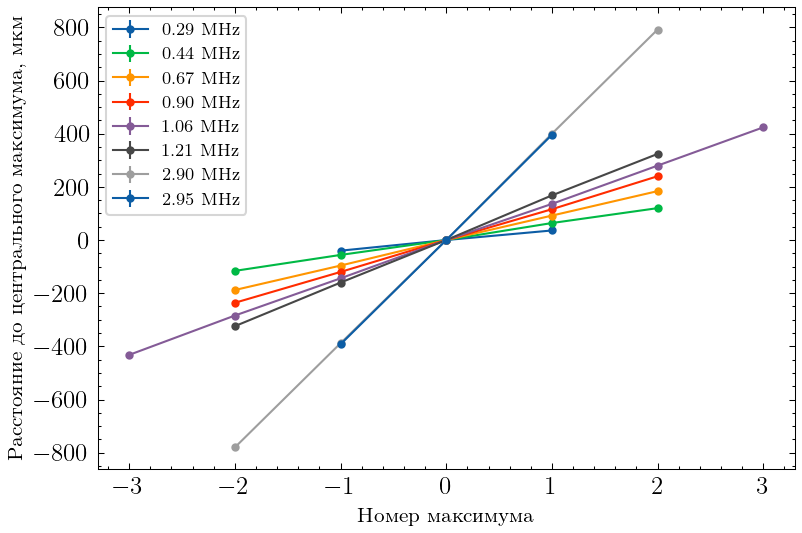

In [195]:
for x in x_array:
    count = x['count']
    m = np.linspace(-count, count, count * 2 + 1, dtype=np.int32)
    y = 4 * np.array(x['data'])
    y = y - y[count]
    
    plt.errorbar(m, y, yerr=4, label=f'${x["frequency"]:.2f}$ MHz', marker='.')
    
plt.xlabel('Номер максимума', fontsize='small')
plt.ylabel('Расстояние до центрального максимума, мкм', fontsize='small')
plt.legend(frameon=True, fontsize='x-small')
plt.show()

Полоса пропускания красного фильтра 6400+-200 ангстрем

f = 110mm

**Цена деления окулярной шкалы микроскопа, мм**

In [35]:
k = 2 / 43

In [67]:
Lambda_temn = 2 * 92 / 7 # длина волны по методу темн поля в делениях оклулярной шкалы
Lambda_temn = Lambda_temn * k * 1e-3
nu_temn = 1.243e6 # частота МГц

In [68]:
v = Lambda_temn * nu_temn
v

1519.6810631229237

Для разных частот

При перемещении проволоки стало ничего не видно

Второе явление обяснить